Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" below:

In [0]:
NAME = "Kabini Salim Kumar"

---

As part of this assignment, we will be learning to model a  handwritten digit classifier using Multi-layer Neural Network. The model will be trained to classify the images of handwritten digits into 10 classes( digits 0 -9).
We will be using [MNIST dataset of handwritten digits](http://yann.lecun.com/exdb/mnist/) for training the classifier.The dataset is a good example of real-world data and is widely used by Machine Learning community for learning techniques and pattern recognition methods.

MNIST dataset contains grayscale samples of handwritten digits of size 28 $\times$ 28. It is split into training set of 60,000 examples, and a test set of 10,000 examples. For this assignment, we will using a smaller subset of 1500 training samples, 500 validation samples and 1000 test samples.

# Libraries

As first step, let us import the required datasets and libraries.

In [0]:
from datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
import numpy.testing as npt
import pytest
import random
import numpy.matlib 

random.seed(1)
np.random.seed(1)

In [0]:
train_samples = 1500
val_samples = 500
test_samples = 1000

In [0]:
digits = list(range(10))
trX, trY, tsX, tsY, valX, valY = mnist(train_samples,val_samples,test_samples, digits=digits)

# Visualize images

Let's visualize few samples and their labels from the train and test dataset. 

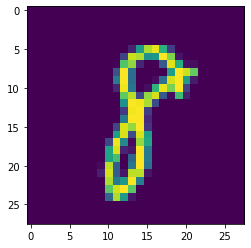

In [0]:
plt.imshow(trX[:,0].reshape(28,28))

In [0]:
trY[:,0]

array([8.])

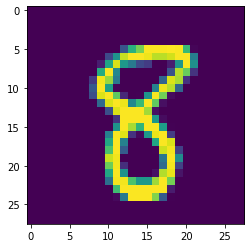

In [0]:
plt.imshow(tsX[:,100].reshape(28,28))

In [0]:
tsY[:,100]

array([8.])

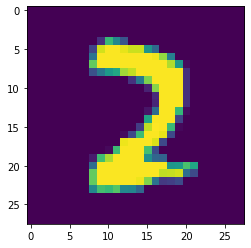

In [0]:
plt.imshow(valX[:,0].reshape(28,28))

In [0]:
valY[:,0]

array([2.])

We can split the assignment into 3 sections.

## Section 1  
We will build the primary components of a Neural network. We will define the activation functions and their derivatives which will be used later during forward and backward propagation. We will also define Dropout for regularization. Finally We will define the softmax cross entropy loss for calculating the prediction loss.

## Section 2
In section 2, We will use the components from section 1 to define forward and back propagations. We will initially perform a single forward/backward pass and extend it to multi-layer network.

## Section 3
In the final section, We will assemble all the components into a single Neural Network as shown below. We will train the model to classify the images into 10 classes. 


![Architechture](images/MLP_architechture.png)

# Section 1

# Parameter Initialization (5 points)

Let us now define a function that can initialize the parameters of the Neural Network.
The network parameters are wrapped as dictionary elements that can easily be passed as function parameters while calculating gradients during back propogation.

1. The weight matrix is initialized with random values from a normal distribution of variance $1$. For example, to create a matrix $W$ of dimension $3 \times 4$, with values from a normal distribution with variance $1$,
we define $W = np.random.normal(size =(3,4))$.

2. Bias values are initialized with a vector of 0's.

The dimension of weight matrix for a layer $(l+1)$ is given by ( Number of neurons in $(l+1)$  X  Number of neurons in $l$ )

The dimension of bias vector for a layer $(l+1)$ is given by ( Number of neurons in $(l+1)$  X  Number of neurons in $1$ )

In [0]:
def initialize(net_dims):
    '''
    Inputs:
    
    net_dims - Array containing the dimensions of the network. The values of the array represent the number of nodes in 
    each layer. For Example, if a Neural network contains 784 nodes in the input layer , 800 in the first hidden layer,
     500 in the secound hidden layer and 10 in the output layer, then net_dims =[784,800,500,10]. 
    
    Outputs:
    parameters - Dictionary element for storing the Weights and bias of each layer of the network
    '''
    numLayers = len(net_dims)
    parameters = {}
    for l in range(numLayers-1):
        # Hint:    
        # parameters["W"+str(l+1)] = 
        # parameters["b"+str(l+1)] =
        # YOUR CODE HERE

        parameters["W"+str(l+1)] = np.random.normal(size=(net_dims[l+1],net_dims[l]))
        parameters["b"+str(l+1)] = np.random.normal(size=(net_dims[l+1],1))
#         raise NotImplementedError()
    return parameters

In [0]:
#Test 
net_dims_tst = [5,4,1]
parameters_tst = initialize(net_dims_tst)
assert parameters_tst['W1'].shape == (4,5)
assert parameters_tst['b1'].shape == (4,1)


# Activation function

As discussed in the lecture, An Activation function takes an input from the previous layer and performs a certain fixed mathematical operation and the result is passed to the following layer.
1. ReLU or Rectified Linear Unit
2. Linear activation

## ReLU (Rectified Linear Unit) (5 points)

ReLU (Rectified Linear Unit) is a piecewise linear function that will output the input if is positive, otherwise, it's output is zero.

\begin{equation*}
ReLU(x) = Max(0,x)
\end{equation*}

Hint: use [numpy.maximum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.maximum.html)

In [0]:
def relu(Z):
    '''
    Computes relu activation of Z
    
    Inputs: 
        Z is a numpy.ndarray (n, m) which represent 'm' samples each of 'n' dimension
        
    Returns: 
        A is activation. numpy.ndarray (n, m) representing 'm' samples each of 'n' dimension
        cache is a dictionary with {"Z", Z}
        
    '''
    cache = {}
    # YOUR CODE HERE
    A = np.maximum(0,Z)
    cache["Z"] = Z
#     raise NotImplementedError()
    return A, cache

In [0]:
#Test
z_tst = np.array([[-1,2],[3,-6]])
a_tst, c_tst = relu(z_tst)
npt.assert_array_equal(a_tst,[[0,2],[3,0]])
assert (c_tst["Z"] == np.array([[-1,2],[3,-6]])).all()


# ReLU - Gradient

The gradient of ReLu is a simple unit function with output 0 for all values less than 0.

In [0]:
def relu_der(dA, cache):
    '''
    Computes derivative of relu activation
    
    Inputs: 
        dA is the derivative from the upstream layer with dimensions (n, m)
        cache is a dictionary with {"Z", Z}, where Z was the input 
        to the activation layer during forward propagation
        
    Returns: 
        dZ is the derivative. numpy.ndarray (n,m)
        
    '''
    dZ = np.array(dA, copy=True)
    Z = cache["Z"]
    # YOUR CODE HERE
#     dZ[dZ<0] = 0
#     dZ[Z>0] = 1
    dZ[Z<0] = 0
#     raise NotImplementedError()
    return dZ

In [0]:
#Test`
dA_tst = np.array([[-7,5],[2,-3]])
cache_tst ={}
cache_tst["Z"] = np.array([[-1,1],[0,-3]])
dZ_tst = relu_der(dA_tst,cache_tst)
npt.assert_array_equal(dZ_tst,np.array([[0,5],[2,0]]))

## Linear

 Linear activation performs a simple linear operation of passing the input.
\begin{equation*}
Linear(x) = x\\
dx = 1
\end{equation*}

In [0]:
def linear(Z):
    '''
    computes linear activation of Z
    This function is implemented for completeness
    Inputs: 
        Z is a numpy.ndarray (n, m)
        
    Returns: 
        A is activation. numpy.ndarray (n, m)
        cache is a dictionary with {"Z", Z}   
    '''
    A = Z
    cache = {}
    cache["Z"] = Z
    return A, cache

In [0]:
def linear_der(dA, cache):
    '''
    Computes derivative of linear activation
    This function is implemented for completeness
    
    Inputs: 
        dA is the derivative from subsequent layer. numpy.ndarray (n, m)
        cache is a dictionary with {"Z", Z}, where Z was the input 
        to the activation layer during forward propagation
    
    Returns: 
        dZ is the derivative. numpy.ndarray (n,m)
    '''      
    dZ = np.array(dA, copy=True)
    return dZ

# Loss function (10 Points)

The softmax activation is computed on the outputs from the last layer and the output label with the maximum probablity is predicted as class label. The softmax function can also be refered as  normalized exponential function which takes a vector of $n$ real numbers as input, and normalizes it into a probability distribution consisting of $n$ probabilities proportional to the exponentials of the input numbers. 

The input to the softmax function is the matrix of all the samples, $ Z = [ z^{(1)} , z^{(2)}, \ldots, z^{(m)} ] $, where $z^{(i)}$ is the $i^{th}$ sample of $n$ dimensions. We estimate the softmax for each of the samples $1$ to $m$. The softmax activation for $a^{(i)} = \text{softmax}(z^{(i)})$ is, 
\begin{equation}
a_k{(i)} = \frac{exp(z^{(i)}_k)}{\sum_{k = 1}^{n}exp(z^{(i)}_k)} \qquad \text{for} \quad 1\leq k\leq n
\end{equation}

The output of the softmax is $ A = [ a^{(1)} , a^{(2)} .... a^{(m)} ]$, where $a^{(i)} = [a^{(i)}_1,a^{(i)}_2, \ldots, a^{(i)}_n]^\top$.  In order to avoid floating point overflow, we subtract a constant from all the input components of $z^{(i)}$ before calculating the softmax. This constant is $z_{max}$, where, $z_{max} = max(z_1,z_2,...z_n)$. 
Note: There is a change in notation from the lecture. In the lecture, we had $a^{(i)} = [a^{(i)}_0,a^{(i)}_1, \ldots, a^{(i)}_K]^\top$, but here we denote $a^{(i)} = [a^{(i)}_1,a^{(i)}_2, \ldots, a^{(i)}_n]^\top$. 
The activation is given by,

\begin{equation}
a_k{(i)} = \frac{exp(z^{(i)}_k- z_{max})}{\sum_{k = 1}^{n}exp(z^{(i)}_k - z_{max})} \qquad \text{for} \quad 1\leq k\leq n
\end{equation}

If the output of softmax is given by $A$ and the ground truth is given by $Y = [ y^{(1)} , y^{(2)}, \ldots, y^{(m)}]$, the cross entropy loss between the predictions $A$ and groundtruth labels $Y$ is given by,

\begin{equation}
Loss(A,Y) = - \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^{n}I \{ y^i = k \} \text{log}a_k^i
\end{equation}


where $I$ is the identity function given by 

\begin{equation}
I\{\text{condition}\} = 1, \quad \text{if condition = True}\\
I\{\text{condition}\} = 0, \quad \text{if condition = False}\\
\end{equation}
Hint: use [numpy.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)
numpy.max,
[numpy.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html)
[numpy.log](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html)
Also refer to use of 'keepdims' and 'axis' parameter.

In [0]:
def softmax_cross_entropy_loss(Z, Y=np.array([])):
    '''
    Computes the softmax activation of the inputs Z
    Estimates the cross entropy loss

    Inputs: 
        Z - numpy.ndarray (n, m)
        Y - numpy.ndarray (d, m) - labels in one-hot representation
            when y=[] loss is set to []
    
    Returns:
        A - numpy.ndarray (n, m) of softmax activations
        cache -  a dictionary to store the activations later used to estimate derivatives
        loss - cost of prediction
    '''
# YOUR CODE HERE
#     raise NotImplementedError()
    A = np.exp(Z - np.max(Z,axis = 0)) / np.sum(np.exp(Z-np.max(Z,axis = 0)),axis = 0)
    m = A.shape[1]
    if Y.shape[0] == 0:
        loss = 0
    else:
        loss = -(1/ m) * np.sum(Y*np.log(A+ 1e-8))

    cache = {}
    cache["A"] = A
    return A, cache, loss

In [0]:
A_tst, _ ,_ = softmax_cross_entropy_loss(np.array([[-1,0,1],[2,1,-3]]))
npt.assert_almost_equal(np.sum(A_tst),3,5)



# One-hot representation

One-hot encoding is a vector representation of the class labels, where all the elements of the vector, except the  class being represented, is zero. This representation will be used to identify the prediction label and calculate the loss of the network.


Let the number of categories be $K=3$. Let ground truth labels be $Y = [0,2,1,0]$. Then the one-hot representation of $Y$ is 
\begin{equation}
\bar{Y} = 
    \begin{bmatrix}
    1 ~ 0 ~ 0 ~ 1\\
    0 ~ 0 ~ 1 ~ 0\\
    0 ~ 1 ~ 0 ~ 0
    \end{bmatrix}
\end{equation}
where, the one-hot encoding for label $y^{(1)} = 1$ is $\bar{y}^{(1)} = [1, 0, 0]^\top$. Similarly, the one-hot encoding for $y^{(2)} = 3$ is $\bar{y}^{(2)} = [0, 0, 1]^\top$

In [0]:
def one_hot(Y,num_classes):
    '''
    Return one hot vector for the lables

    Inputs:
        Y - Labels of dimension (1,m)
        num_classes - Number of output classes
        
    Ouputs:
        Y_one_hot - one hot vector of dimension(n_classes,m)
    '''
    Y_one_hot = np.zeros((num_classes,Y.shape[1]))
    for i in range(Y.shape[1]):
        Y_one_hot[int(Y[0,i]),i] = 1
    return Y_one_hot

# Derivative of the Loss Function(5 points)

The derivative of the multiclass cross entropy loss can be given as the difference between the Activation output and ground truth. If $A$ is vector of $m$ samples , as $ A = [ a^{(1)} , a^{(2)} .... a^{(m)} ]$, the gradient of softmax is given by,

\begin{equation}
dZ =\frac{1}{m} (A -Y)
\end{equation}

In [0]:
def softmax_cross_entropy_loss_der(Y, cache):
    '''
    Computes the derivative of softmax activation and cross entropy loss

    Inputs: 
        Y - numpy.ndarray (n,m) is a one-hot encoding of the ground truth labels
        cache -  a dictionary with cached activations A of size (n,m)

    Returns:
        dZ - numpy.ndarray (n, m) derivative for the previous layer
    '''
    A = cache["A"]
# YOUR CODE HERE
    A1 = np.subtract(A,Y)
    m = Y.shape[1]
    dZ = A1/m
    
# raise NotImplementedError()
    return dZ

In [0]:
c_tst = {'A':np.array([[0.4,0.4],[0.6,0.6]])}
Y_tst = np.array([[0,1],[1,0]])
npt.assert_array_almost_equal(softmax_cross_entropy_loss_der(Y_tst, c_tst),np.array([[0.2,-0.3],[-0.2,0.3]]))



## Drop Out (5 Points)

In [0]:
def dropout_forward(A, drop_prob, mode='train'):
        '''
        Using the 'inverted dropout' technique to implement dropout regularization.
        Inputs:
                A - Activation matrix
                drop_prob - the probability of dropping a neuron's activation. For e.g., let drop_prob = 0.8, 
                this implies that we drop 80% of the activations and keep only 20% of the activations. 
                We implement the mask using a uniform distribution 
                mask = np.random.rand(*A.shape) 
                This generates a matrix the same size as A but with random values in [0,1]
                We now need to threshold the mask to keep 20% of its values. We can keep either the top 20% 
                or the bottom 20% - Both implementations are correct. The test case however checks for top 20%
                For the test case to pass and not lose points, keep the top 20% of the values in mask 
                mask = np.random.rand(*A.shape) > drop_prob 
                You can now apply the mask on A and scale the values of A to account for 
                the dropped activations 
                
                mode - Dropout acts differently in training and testing mode. Hence, mode is a parameter which
                takes in only 2 values, 'train' or 'test'
                
                Example: Let A = [3 x 4] matrix and drop_prob = 0.8, then 
                A = [[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
                     [1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01]
                     [3.96767474e-01 5.38816734e-01 4.19194514e-01 6.85219500e-01]]
                mask = [[0 1 0 0]
                        [0 0 0 0]
                        [1 1 0 0]]
                output = [[0.         3.60162247 0.         0.        ]
                          [0.         0.         0.         0.        ]
                          [1.98383737 2.69408367 0.         0.        ]]

        Outputs:
                out - Output of shape(n,m) same as input but with some values masked out.
                cache - a tuple which stores the values that are required in the backward pass.
        '''
        mask = None
        out = None
        p_keep = 1-drop_prob
        
        if mode == 'train':
# YOUR CODE HERE
            mask = np.random.rand(A.shape[0],A.shape[1]) > drop_prob
            out = A*mask
            out = out/p_keep
            
            
# raise NotImplementedError()
        elif mode == 'test':
            out = A
# YOUR CODE HERE
# raise NotImplementedError()
        else:
            raise ValueError("Mode value not set, set it to 'train' or 'test'")
            
        
        cache = (mode, mask)
        out = out.astype(A.dtype, copy=False)
        return out, cache

In [0]:
random.seed(1)
np.random.seed(1)

x = np.random.rand(10,10)
drop_prob = 0.2
out, cache = dropout_forward(x, drop_prob, mode='train')
npt.assert_almost_equal(np.sum(out),45.704208,6)

out, cache = dropout_forward(x, drop_prob, mode='test')
npt.assert_almost_equal(np.sum(out), 48.587792, 6)


In [0]:
def dropout_backward(cache, dout):
        '''
        Backward pass for the inverted dropout.
        Inputs: 
              dout: derivatives from the upstream layers of dimension (n,m).
              cache: contains the mask, input, and chosen dropout probability from the forward pass.
        Outputs:
              dA = derivative from the layer of dimension (n,m)
        '''
        dA = None
        mode, mask = cache
        if mode == 'train':
            # YOUR CODE HERE
            dA = dout * mask
#             raise NotImplementedError()
        elif mode == 'test':
            # YOUR CODE HERE
#             raise NotImplementedError()
            dA = dout
        else:
            raise ValueError("Mode value not set, set it to 'train' or 'test'")
        return dA

In [0]:
np.random.seed(1)
random.seed(1)

dout = np.random.rand(3,2)
mask = np.random.rand(3,2)
mode = 'test'
cache = (mode, mask)
dA = dropout_backward(cache, dout)
npt.assert_almost_equal(np.sum(dA),1.6788879311798277,6)

mode = 'train'
cache = (mode, mask)
dA = dropout_backward(cache, dout)
npt.assert_almost_equal(np.sum(dA),0.61432916214326,6)


# Section 2

## Forward Propagation 

## One Layer
  
If the vectorized input to any layer of neural network is $A$ and the parameters of the layer is given by $(W,b)$ ,the output of the layer is,
\begin{equation}
Z = W A + b
\end{equation}

In [0]:
def linear_forward(A, W, b):
    '''
    Input A propagates through the layer 
    Z = WA + b is the output of this layer. 

    Inputs: 
        A - numpy.ndarray (n,m) the input to the layer
        W - numpy.ndarray (n_out, n) the weights of the layer
        b - numpy.ndarray (n_out, 1) the bias of the layer

    Returns:
        out = dropout(WA + b), where out is the numpy.ndarray (n_out, m) dimensions
        cache - a dictionary containing the inputs A
    '''
    Z = np.dot(W, A) + b

    cache = {}
    cache["A"] = A
    return Z, cache 

## Layer + Activation
In addition to layer, the following function also computes the activation of each layer which is given by,
\begin{equation}
Z = W X + b\\
A = \sigma (Z)
\end{equation}

depending on the activation choosen for the given layer, the $\sigma(.)$ can represent different operations.


In [0]:
def layer_forward(A_prev, W, b, activation, drop_prob, mode):
    '''
    Input A_prev propagates through the layer and the activation

    Inputs: 
        A_prev - numpy.ndarray (n,m) the input to the layer
        W - numpy.ndarray (n_out, n) the weights of the layer
        b - numpy.ndarray (n_out, 1) the bias of the layer
        activation - is the string that specifies the activation function

    Returns:
        A = g(Z), where Z = WA + b, where Z is the numpy.ndarray (n_out, m) dimensions
        g is the activation function
        cache - a dictionary containing the cache from the linear and the nonlinear propagation
        to be used for derivative
    '''

    Z, lin_cache = linear_forward(A_prev, W, b)
    
    if activation == "relu":
        A, act_cache = relu(Z)
        A, drop_cache =  dropout_forward(A, drop_prob, mode)
        
    elif activation == "linear":
        A, act_cache = linear(Z)
        drop_cache = None
        

    cache = {}
    cache["lin_cache"] = lin_cache
    cache["act_cache"] = act_cache
    cache["drop_cache"] = drop_cache
    
    return A, cache

## Multi-Layers (5 Points)

The forward layers are stacked to form a multi layer network. The number of layers used by the network can be inferred from the size of the $parameters$. If the number of items in the dictionary element $parameters$ is $2L$, then the number of layers will be $L$

During forward propagation , the input sample $A_0$ is fed into the first layer and the subsequent layers use the activation output from the previous layer as inputs.

Please note all the hidden layers use **ReLU** activation except the last layer which uses **Linear** activation.

In [0]:
def multi_layer_forward(X, parameters,drop_prob, mode):
    '''
    Forward propgation through the layers of the network

    Inputs: 
        X - numpy.ndarray (n,m) with n features and m samples
        parameters - dictionary of network parameters {"W1":[..],"b1":[..],"W2":[..],"b2":[..]...}
    Returns:
        AL - numpy.ndarray (c,m)  - outputs of the last fully connected layer before softmax
            where c is number of categories and m is number of samples in the batch
        caches - a dictionary of associated caches of parameters and network inputs
    '''
    L = len(parameters)//2  
    A = X
    caches = []
    
    for l in range(1,L):
    # YOUR CODE HERE
#     raise NotImplementedError()
        A, cache = layer_forward(A, parameters["W"+str(l)], parameters["b"+str(l)], "relu",drop_prob, mode)
        caches.append(cache)
        
    
    AL, cache = layer_forward(A, parameters["W"+str(L)], parameters["b"+str(L)], "linear",drop_prob, mode)
    caches.append(cache)
    return AL, caches

In [0]:
X_tst = np.array([[1,3,2,5],[2,4,-2,6]])
param_tst ={'W1':[1,2],'b1':1}
drop_prob = 0.33
mode = 'test'
AL_t,c_t= multi_layer_forward(X_tst, param_tst, drop_prob, mode)
npt.assert_array_almost_equal(AL_t,np.array([ 6, 12, -1, 18]))


# Backward Propagagtion (10 Points)

Let us now perform back propagation through the layers and calculate the gradients of the network parameters $(dW,db)$.

If the derivative of the loss$\frac{dL}{dZ}$ is given as $dZ$ and network paramerters are given as $(W,b)$, the gradients $(dW,db)$ can be calculated as,

\begin{equation}
dA_{prev} = W^T dZ\\
dW = dZ A^T\\
db = \sum_{i=1}^{m} dz^{(i)}\\
\end{equation}

where $dZ = [dz^{(1)},dz^{(2)}, \ldots, dz^{(m)}]$ is the column vector of the gradient of loss in the kth layer.

In [0]:
def linear_backward(dZ, cache, W, b):
    '''
    Backward prpagation through the linear layer

    Inputs:
        dZ - numpy.ndarray (n,m) derivative dL/dz 
        cache - a dictionary containing the inputs A, for the linear layer
            where Z = WA + b,    
            Z is (n,m); W is (n,p); A is (p,m); b is (n,1)
        W - numpy.ndarray (n,p)
        b - numpy.ndarray (n, 1)

    Returns:
        dA_prev - numpy.ndarray (p,m) the derivative to the previous layer
        dW - numpy.ndarray (n,p) the gradient of W 
        db - numpy.ndarray (n, 1) the gradient of b
    '''      
    A = cache['A']
    # YOUR CODE HERE
#     raise NotImplementedError()
    dW = np.dot(dZ, A.T)
    db = np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T, dZ)
    return dA_prev, dW, db

In [0]:
cache_test ={}
A_tst = np.array([[1,3,2,5],[2,4,-2,6]])
cache_test['A'] = A_tst
W_tst = np.array([[3,2,1,-1],[1,3,1,3]])
b_tst = np.array([1,1]).reshape(-1,1)
dZ_tst = np.array([[0.1,0.3,0.1,.7],[.2,.3,0.3,.5]])

dA_prev,dW_tst,db_tst = linear_backward(dZ_tst, cache_test, W_tst, b_tst)
npt.assert_almost_equal(np.sum(dA_prev),16.4)
npt.assert_array_almost_equal(dW_tst,np.array([[4.7, 5.4],[4.2, 4. ]]))
npt.assert_array_almost_equal(db_tst,np.array([[1.2],[1.3]]))


## Layer + Activation

In the below function, we also account for the activation while calculating the derivative.
We use the derivative functions defined earlier to calculate $(\frac{dL}{dZ})$ followed by back propagation.

In [0]:
def layer_backward(dA, cache, W, b, activation):
    '''
    Backward propagation through the activation and linear layer

    Inputs:
        dA - numpy.ndarray (n,m) the derivative to the previous layer
        cache - dictionary containing the linear_cache and the activation_cache
        activation - activation of the layer
        W - numpy.ndarray (n,p)
        b - numpy.ndarray (n, 1)
    
    Returns:
        dA_prev - numpy.ndarray (p,m) the derivative to the previous layer
        dW - numpy.ndarray (n,p) the gradient of W 
        db - numpy.ndarray (n, 1) the gradient of b
    '''
    lin_cache = cache["lin_cache"]
    act_cache = cache["act_cache"]
    drop_cache = cache["drop_cache"]

    if activation == "relu":
        
        dA = dropout_backward(drop_cache, dA)
        dZ = relu_der(dA, act_cache)
        
    elif activation == "linear":
        
        dZ = linear_der(dA, act_cache)
        
    dA_prev, dW, db = linear_backward(dZ, lin_cache, W, b)
    return dA_prev, dW, db

## Multi-layers

We have defined the required functions to handle back propagation for single layer. Now we will stack the layers together and perform back propagation on the entire network.

In [0]:
def multi_layer_backward(dAL, caches, parameters):
    '''
    Back propgation through the layers of the network (except softmax cross entropy)
    softmax_cross_entropy can be handled separately

    Inputs: 
        dAL - numpy.ndarray (n,m) derivatives from the softmax_cross_entropy layer
        caches - a dictionary of associated caches of parameters and network inputs
        parameters - dictionary of network parameters {"W1":[..],"b1":[..],"W2":[..],"b2":[..]...}

    Returns:
        gradients - dictionary of gradient of network parameters 
            {"dW1":[..],"db1":[..],"dW2":[..],"db2":[..],...}
    '''

    L = len(caches) 
    gradients = {}
    dA = dAL
    activation = "linear"
    for l in reversed(range(1,L+1)):
        dA, gradients["dW"+str(l)], gradients["db"+str(l)] = \
                    layer_backward(dA, caches[l-1], \
                    parameters["W"+str(l)],parameters["b"+str(l)],\
                    activation)
        activation = "relu"
    return gradients

## Prediction (5 Points)

Let us now assemble the different parts of forward propagation into a single unit and use the ouput to make a prediction.

Step 1 - Forward propagate X using multi_layer_forward and obtain the activation 'A'.<br>
Step 2 - Using 'softmax_cross_entropy loss', obtain softmax activation of last layer.<br>
Step 3 - Class label 'Ypred' is predicted as the 'argmax' of the softmax activation from step 2.<br>
Note: the shape of 'YPred' is (1,m), where m is the number of samples

In [0]:
def classify(X, parameters,mode,drop_prob):
    '''
    Network prediction for inputs X

    Inputs: 
        X - numpy.ndarray (n,m) with n features and m samples
        parameters - dictionary of network parameters 
            {"W1":[..],"b1":[..],"W2":[..],"b2":[..],...}
    Returns:
        YPred - numpy.ndarray (1,m) of predictions
    '''
    # Forward propagate input 'X' using multi_layer_forward and obtain the activation 'A'
    # Using 'softmax_cross_entropy loss', obtain softmax activation of last layer with input 'A' from step 1
    # Predict class label 'YPred' as the 'argmax' of softmax activation from step-2. 
    # Note: the shape of 'YPred' is (1,m), where m is the number of samples

    # YOUR CODE HERE
#     raise NotImplementedError()
#     x, n_samples = X.shape
    A, caches = multi_layer_forward(X, parameters, drop_prob, mode)
    Z, c, cost = softmax_cross_entropy_loss(A)
#     YPred = [np.argmax(Z, axis=0)]
    YPred = np.argmax(Z, axis =0)[np.newaxis,:]
    
    return YPred

In [0]:
mode = 'train'
drop_prob = 0.2
X_tst = np.array([[-1,2,1],[1,1,3]])
param_tst ={'W1':5,'b1':3}
npt.assert_array_almost_equal(classify(X_tst, param_tst,mode,drop_prob),[[1,0,1]])


## Momentum

A very popular technique that is used along with gradient descent is Momentum. Instead of using only the gradient of the current step to guide the search for minima, momentum also accumulates the gradient of the past steps to determine the direction of descent.

In [0]:
def initialize_velocity(parameters):
    '''
    Inputs:
        parameters - The Weight and Bias parameters of the network
        
    Outputs:
        v - velocity parameter
    '''
    
    L = len(parameters) // 2 
    v = {}
    
    # Initialize velocity
    for l in range(L):
        v["dW" + str(l + 1)] = np.zeros_like(parameters["W" + str(l+1)])
        v["db" + str(l + 1)] = np.zeros_like(parameters["b" + str(l+1)])
            
    return v

## Parameter updates

The parameter gradients $(dW,db)$ calculated during back propagation are used to update the values of the network parameters.

\begin{equation}
V_{t+1} = \beta  V_{t} +(1-\beta)\nabla J(\theta_t)\\
\theta_{t+1} =\theta_{t} -\alpha(V_{t+1}), \quad \theta \in \{ W,b \}
\end{equation}

Where $\alpha$ is the learning rate of the network and $\beta$ is the momentum parameter . As discussed in the lecture, decay rate is used to adjust the learning rate smoothly across the gradient curve to avoid overshooting.

In [0]:
def update_parameters_with_momentum(parameters, gradients, epoch, v, beta, learning_rate, decay_rate=0.01):
    '''
    Updates the network parameters with gradient descent

    Inputs:
        parameters - dictionary of network parameters 
            {"W1":[..],"b1":[..],"W2":[..],"b2":[..],...}
        gradients - dictionary of gradient of network parameters 
            {"dW1":[..],"db1":[..],"dW2":[..],"db2":[..],...}
        epoch - epoch number
        v - Velocity parameter
        beta - momentum parameter
        learning_rate - step size for learning
        decay_rate - rate of decay of step size - not necessary - in case you want to use
    '''
    
    alpha = learning_rate*(1/(1+decay_rate*epoch))
    L = len(parameters) // 2 # number of layers in the neural networks
    
    for i in range(L):
    # YOUR CODE HERE
#     raise NotImplementedError()
        
        # velocity
        v['dW' + str(i+1)] = (beta * v['dW' + str(i+1)]) + ((1 - beta) * gradients['dW' + str(i+1)])
        v['db' + str(i+1)] = (beta * v['db' + str(i+1)]) + ((1 - beta) * gradients['db' + str(i+1)])
        
        # update parameters
        parameters['W' + str(i+1)] = parameters['W' + str(i+1)] - (alpha * v['dW' + str(i+1)])
        parameters['b' + str(i+1)] = parameters['b' + str(i+1)] - (alpha * v['db' + str(i+1)])             
       
    return parameters, alpha, v

In [0]:
X_tst = [1,3,5,7]
param_tst ={'W1':5,'b1':7,'W2':2,'b2':3}
grad_tst ={'dW1':1,'db1':2,'dW2':-1,'db2':3}
epoch_tst = 1
v = {'dW1':1,'db1':1,'dW2':1,'db2':1}
learning_rate_tst = 1
decay_rate = 0.01
beta = 0.2

param_tst, al_tst, v_tst = update_parameters_with_momentum(param_tst, grad_tst, epoch_tst, v, beta, learning_rate_tst, decay_rate)

assert param_tst == {'W1': pytest.approx(4.009, 0.01), 'b1': pytest.approx(5.217, 0.01), 'W2': pytest.approx(2.594, 0.01), 'b2': pytest.approx(0.425, 0.01)}


# Section 3

# Neural Network (10 Points)

Let us now assemble all the components of the neural network together and define a complete training loop for the Multi-layer Neural Network.

In [0]:
def multi_layer_network(X, Y,valX, valY, net_dims, drop_prob, mode, num_iterations=500, learning_rate=0.2, decay_rate=0.00005):
    
    '''
    Creates the multilayer network and trains the network

    Inputs:
        X - numpy.ndarray (n,m) of training data
        Y - numpy.ndarray (1,m) of training data labels
        valX - numpy.ndarray(n,m) of validation data
        valY - numpy.ndarray(1,m) of validation data labels
        net_dims - tuple of layer dimensions
        drop_prob - dropout parameter, we drop the number of neurons in a given layer with respect to prob.
        mode - Takes in 2 values 'train' or 'test' mode. Model behaviour is dependent on the mode.
        num_iterations - num of epochs to train
        learning_rate - step size for gradient descent
        decay_rate - the rate at which the learning rate is decayed.
        
    Returns:
        costs - list of costs over training
        val_costs - list of validation costs over training
        parameters - dictionary of trained network parameters
    '''

    parameters = initialize(net_dims)
    A0 = X
    costs = []
    val_costs = []
    num_classes = 10
    Y_one_hot = one_hot(Y,num_classes)
    valY_one_hot = one_hot(valY,num_classes)
    alpha = learning_rate
    beta = 0.9
    for ii in range(num_iterations):
        
        ## Forward Propagation (Training data)
        # Step 1: Propagate the input A0 through the layers using multi_layer_forward()
        # and calculate output of last layer Z and obtain cached activations as 'cache_1'
        # Step 2: Compute the softmax activation AL, cross entropy cost and obtain the cached activation of last layer cache_2 using
        # 'Z' from step 1 and 'Y_one_hot' (one hot representation of true class label)
       
        ## Back Propagation (with training data)
        # Step 3: Compute the dervative of the softmax cross entropy loss (dZ) using one-hot encoded class labels 'Y_one_hot'
        # and the cached activations cache_2 from forward pass.
        # Step 4: Compute the parameter 'gradients' by passing dZ (from step 3) and cache1 from forward_pass to multi_layer_backward()
        # Step 5: Initialize the velocity parameter by passing 'parameters' to 'initialize_velocity()'
        # Step 6: Update the parameters of the network and obtain learning rate(alpha) by passing the calculated gradients to update_parameters_with_momentum() function.
       
        ## Forward Propagation (validation data only to estimate the loss)
        # Step 7: Propagate the input valX through the layers using multi_layer_forward() with 'mode' ='test'
        # and calculate output of last layer Z_ and obtain cached activations as 'cache_'
        # Step 8: Compute the softmax activation AL, cross entropy cost for the validation set
        # using 'Z_' from step 7 and 'valY_one_hot' (one hot representation of true class label)    
        
        # step 1 and 2
        Z, cache_1 = multi_layer_forward(A0, parameters, drop_prob, "train")
        AL, cache_2, cost =  softmax_cross_entropy_loss(Z, Y_one_hot)
        
        # step 3
        dZ = softmax_cross_entropy_loss_der(Y_one_hot, cache_2)
        
        gradients = multi_layer_backward(dZ, cache_1, parameters)
        velocity = initialize_velocity(parameters)
        parameters, alpha, velocity = update_parameters_with_momentum(parameters, gradients, ii, velocity, beta, learning_rate, decay_rate)
        
        
        # step 7
        Z_, cache_ = multi_layer_forward(valX, parameters, drop_prob, "test")
        AL, cache, val_cost = softmax_cross_entropy_loss(Z_, valY_one_hot)

        
    
# YOUR CODE HERE
# raise NotImplementedError()
    
        if ii % 10 == 0:
            costs.append(cost)
            val_costs.append(val_cost)
        if ii % 10 == 0:
            print("Cost at iteration %i is: %.05f, learning rate: %.05f" %(ii, cost, alpha))
    
    return costs, val_costs, parameters

# Training
We will now intialize a neural network with 2 hidden layers whose dimensions are 516 and 256 respectively.
Since the input samples are of dimension 28 $\times$ 28, the input layer will be of dimension 784. We will train the model and compute its accuracy on training, validation and test sets. Finally the training and validation cost is plotted against the number of iterations.

Network dimensions are:[784, 516, 256, 10]
Cost at iteration 0 is: 16.44092, learning rate: 0.03000
Cost at iteration 10 is: 9.14074, learning rate: 0.02999
Cost at iteration 20 is: 6.12378, learning rate: 0.02997
Cost at iteration 30 is: 4.58501, learning rate: 0.02996
Cost at iteration 40 is: 3.98217, learning rate: 0.02994
Cost at iteration 50 is: 3.07436, learning rate: 0.02993
Cost at iteration 60 is: 2.77897, learning rate: 0.02991
Cost at iteration 70 is: 2.54394, learning rate: 0.02990
Cost at iteration 80 is: 2.00899, learning rate: 0.02988
Cost at iteration 90 is: 2.11923, learning rate: 0.02987
Cost at iteration 100 is: 1.60138, learning rate: 0.02985
Cost at iteration 110 is: 1.42522, learning rate: 0.02984
Cost at iteration 120 is: 1.12390, learning rate: 0.02982
Cost at iteration 130 is: 0.89688, learning rate: 0.02981
Cost at iteration 140 is: 0.66384, learning rate: 0.02979
Cost at iteration 150 is: 0.62585, learning rate: 0.02978
Cost at iteration 160 is: 0.62542, lear

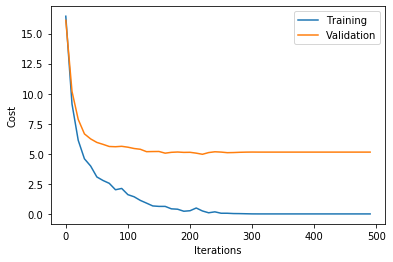

In [0]:
# Configuration 1 - Overfittting case, No dropout regularization

net_dims = [784,516,256]
net_dims.append(10) # Adding the digits layer with dimensionality = 10
print("Network dimensions are:" + str(net_dims))

# getting the subset dataset from MNIST
train_data, train_label, test_data, test_label, val_data, val_label = mnist(noTrSamples=train_samples,noValSamples= val_samples,noTsSamples=test_samples,digits= digits)

# initialize learning rate and num_iterations
learning_rate = .03
num_iterations = 500

drop_prob = 0
mode = 'train'

costs,val_costs, parameters = multi_layer_network(train_data, train_label,val_data, val_label, net_dims, drop_prob, mode, \
        num_iterations=num_iterations, learning_rate= learning_rate)

# compute the accuracy for training set and testing set


mode ='test'
train_Pred = classify(train_data, parameters,mode,drop_prob)
val_Pred = classify(val_data, parameters,mode,drop_prob)
test_Pred = classify(test_data, parameters,mode,drop_prob)
print(train_Pred.shape)


trAcc = ( 1 - np.count_nonzero(train_Pred - train_label ) / float(train_Pred.shape[1])) * 100 
valAcc = ( 1 - np.count_nonzero(val_Pred - val_label ) / float(val_Pred.shape[1])) * 100 
teAcc = ( 1 - np.count_nonzero(test_Pred - test_label ) / float(test_Pred.shape[1]) ) * 100
print("Accuracy for training set is {0:0.3f} %".format(trAcc))
print("Accuracy for validation set is {0:0.3f} %".format(valAcc))
print("Accuracy for testing set is {0:0.3f} %".format(teAcc))

X = range(0,num_iterations,10)
plt.plot(X,costs)
plt.plot(X,val_costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend(['Training','Validation'])
plt.show()

Network dimensions are:[784, 516, 256, 10]
Cost at iteration 0 is: 16.45173, learning rate: 0.03000
Cost at iteration 10 is: 13.50530, learning rate: 0.02999
Cost at iteration 20 is: 11.09141, learning rate: 0.02997
Cost at iteration 30 is: 9.76420, learning rate: 0.02996
Cost at iteration 40 is: 8.58557, learning rate: 0.02994
Cost at iteration 50 is: 7.93578, learning rate: 0.02993
Cost at iteration 60 is: 6.95323, learning rate: 0.02991
Cost at iteration 70 is: 6.69439, learning rate: 0.02990
Cost at iteration 80 is: 6.37866, learning rate: 0.02988
Cost at iteration 90 is: 6.02311, learning rate: 0.02987
Cost at iteration 100 is: 5.83892, learning rate: 0.02985
Cost at iteration 110 is: 5.67112, learning rate: 0.02984
Cost at iteration 120 is: 5.49267, learning rate: 0.02982
Cost at iteration 130 is: 5.36420, learning rate: 0.02981
Cost at iteration 140 is: 5.48759, learning rate: 0.02979
Cost at iteration 150 is: 5.06116, learning rate: 0.02978
Cost at iteration 160 is: 5.11133, le

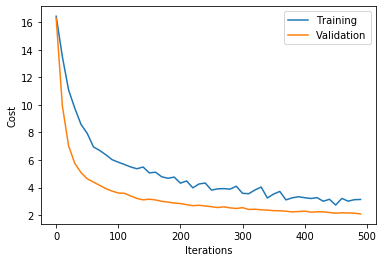

In [0]:
# Configuration 2 - using dropout regularization

net_dims = [784,516,256]
net_dims.append(10) # Adding the digits layer with dimensionality = 10
print("Network dimensions are:" + str(net_dims))

# getting the subset dataset from MNIST
train_data, train_label, test_data, test_label, val_data, val_label = mnist(noTrSamples=train_samples,noValSamples= val_samples,noTsSamples=test_samples,digits= digits)

# initialize learning rate and num_iterations
learning_rate = .03
num_iterations = 500

drop_prob = 0.2
mode = 'train'

costs,val_costs, parameters = multi_layer_network(train_data, train_label,val_data, val_label, net_dims, drop_prob, mode, \
        num_iterations=num_iterations, learning_rate= learning_rate)

# compute the accuracy for training set and testing set
mode ='test'
train_Pred = classify(train_data, parameters,mode,drop_prob)
val_Pred = classify(val_data, parameters,mode,drop_prob)
test_Pred = classify(test_data, parameters,mode,drop_prob)
print(train_Pred.shape)


trAcc = ( 1 - np.count_nonzero(train_Pred - train_label ) / float(train_Pred.shape[1])) * 100 
valAcc = ( 1 - np.count_nonzero(val_Pred - val_label ) / float(val_Pred.shape[1])) * 100 
teAcc = ( 1 - np.count_nonzero(test_Pred - test_label ) / float(test_Pred.shape[1]) ) * 100
print("Accuracy for training set is {0:0.3f} %".format(trAcc))
print("Accuracy for validation set is {0:0.3f} %".format(valAcc))
print("Accuracy for testing set is {0:0.3f} %".format(teAcc))

X = range(0,num_iterations,10)
plt.plot(X,costs)
plt.plot(X,val_costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend(['Training','Validation'])
plt.show()